# PHYS 381 - Assignment #3
#### February 12, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
This week we will be looking at the details involved with performing integration using python.

There are many functions within SciPy that will take care of the integration details, such as the quad function. However, our goal is to get an underlyling understanding of the process. To begin, we went through the details of using the well known trapazoidal approximation for evaluating an integral. This analysis revealed that two important aspects of numerical integration are the number of divisions and the error involved. We will keep these at the top of our list throughout our analysis.

The goal is to use Scipy's romberg function to compute the value of the following triple integral.


$$ \int_{x=0}^1 \int_{y=0}^\sqrt{1-x^2} \int_{z=0}^\sqrt{1-x^2-y^2} \frac{dz \, dy \, dx}{1 + x^2 + y^2 + z^2} $$

After getting comfortable with using the romberg function to take a single integral, we noted that the task at hand was to determine how perform consecutive integrations using a function that can only do one at a time.

The solution to this problem is to create a chain of integrations. In the first integral, the function called inside romberg is the second integral. The second integral evaluates romberg with the thrid integral. Finally, the third integral calls romberg with the integrand.

The following chunck of code defines the functions necessary to evaluate the triple integration in cartesian coordinates. Note that I will wrap everything into a single function in future versions of the code.

In [2]:
tolerance = tolerance=1e-3 # Desired absolute tolerance
def firstIntegral():
    '''
    FILL ME OUT
    '''
    lower = 0.0 # Bounds for first integral  
    upper = 1.0
    # Integrate second integral over the bounds
    return scipy.integrate.romberg(secondIntegral, lower, upper, tol = tolerance, divmax=20)
    
def secondIntegral(x):
    '''
    FILL ME OUT
    '''
    lower = 0 # Bounds for second integral
    upper = np.sqrt(np.abs(1-x*x))
    # Integrate third integral
    return scipy.integrate.romberg(thirdIntegral, lower, upper, args=(x,), tol = tolerance, divmax=20)
    
def thirdIntegral(x,y):
    '''
    FILL ME OUT
    '''
    lower = 0 # Bounds for third integral
    upper = np.sqrt(np.abs(1-x*x-y*y))
    # Integrate integrand 
    return scipy.integrate.romberg(function, lower, upper, args=(x,y), tol = tolerance, divmax=20)

def function(x,y,z):
    '''
    FILL ME OUT
    '''
    return 1/(1+x*x+y*y+z*z)

In [3]:
print('Integration result for tolerance=%.1e' % tolerance, ': %.13f' % firstIntegral() )

Integration result for tolerance=1.0e-03 : 0.3368817777878


To verify that we are on the right track, we will compare our result to that of the tplquad function found in the scipy library. To use this function, I will make use of the integrand defined in function() above as well as define the

In [4]:
def gfun(x):
    return 0
def hfun(x):
    return np.sqrt(np.abs(1-x*x))
def qfun(x,y):
    return 0
def rfun(x,y):
    return np.sqrt(np.abs(1-x*x-y*y))

In [5]:
scipy.integrate.tplquad(function, 0, 1, gfun, hfun, qfun, rfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)

(0.3370957766592014, 5.438126766630307e-09)

We note that we see discepancy between the values at the third decimal place. To decrease the error associated with the value of our integration, we will experiement with the tolerance parameter of romberg.

From our previous experience in computational physics, we expect that decreasing the tolerance will increase the time required for computation. In this case, decreasing the tolerance will increase the number of calls to the integrand. To get a good idea of what is actually happening in our integration, we must record and display the number of calls to the integrand. I will do so by defining a function with getter/ setter attributes, which can be used as a tracker.  

In [6]:
def counter():
    '''
    FILL ME OUT
    '''
    n=1
    # Closure function
    def func():
        pass
    
    # Accessor methods for n
    def get_n():
        return n
    
    def increment():
        nonlocal n
        n += 1
    
    def reset_n():
        nonlocal n
        n = 0
    
    # Attach as function attributes
    func.get_n = get_n
    func.increment = increment
    func.reset_n = reset_n
    return func

In [7]:
# Create instance of counter
count = counter()

I will insert the appropriate counter functions into the code which handles the integration, and wrap it all inside of a function. 

In [8]:
def Integration():
    """
    FILL ME OUT
    """
    
    # Restart the counter
    count.reset_n()
    def outerIntegral1():
        """
        FILL ME OUT
        """
        lower1 = 0.0
        upper1 = 1.0
        return scipy.integrate.romberg(middleIntegral1, lower1, upper1, tol = tolerance, divmax=20, show=False)
    def middleIntegral1(x):
        """
        FILL ME OUT
        """
        lower2 = 0
        upper2 = np.sqrt(np.abs(1-x*x))
        return scipy.integrate.romberg(innerIntegral1, lower2, upper2, args=(x,), tol = tolerance, divmax=20)
    def innerIntegral1(x,y):
        '''
        FILL ME OUT
        '''
        lower3 = 0
        upper3 = np.sqrt(np.abs(1-x*x-y*y))     
        return scipy.integrate.romberg(function, lower3, upper3, args=(x,y), tol = tolerance, divmax=20)
    def function(x,y,z):
        '''
        FILL ME OUT
        '''
        # Increase counter by one
        count.increment()
        return 1/(1+x*x+y*y+z*z)
    return outerIntegral1()

Next I will vary the tolerance and see how the this affects the computation by tracking how many times the integrand is called. I will run a for loop over various tolerance and display the counts.

In [9]:
tolList = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

for element in tolList:
    tolerance = element
    print('Tolerance: %.e' % element, '\n\tIntegral result: %.13f' % Integration(), '\n\tIntegrand calls: %1d' % count.get_n())

Tolerance: 1e-01 
	Integral result: 0.3257807257621 
	Integrand calls: 33
Tolerance: 1e-02 
	Integral result: 0.3350719562045 
	Integrand calls: 149
Tolerance: 1e-03 
	Integral result: 0.3368817777878 
	Integrand calls: 645
Tolerance: 1e-04 
	Integral result: 0.3370695310761 
	Integrand calls: 6063
Tolerance: 1e-05 
	Integral result: 0.3370923350916 
	Integrand calls: 78253
Tolerance: 1e-06 
	Integral result: 0.3370953613758 
	Integrand calls: 419651


It appears as though the integrand calls are increasing exponentially with respect to decreasing tolerance. To provide a qualitative description of this relationship, we will graph the relationship using a logarithmic scale.

In [10]:
toleranceList = []
countList = []
for tolerance in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    count.reset_n()
    Integration()
    toleranceList.append(tolerance)
    countList.append(count.get_n())
toleranceList = np.array(toleranceList)
countList = np.array(countList)
print('Tolerance:      ', toleranceList)
print('Integrand calls:', countList)

Tolerance:       [1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06]
Integrand calls: [    33    149    645   6063  78253 419651]


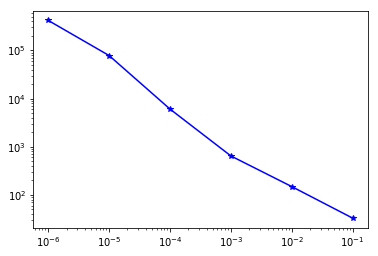

In [11]:
plt.plot( toleranceList, countList, 'b-*')
plt.xscale('log')
plt.yscale('log')

In [12]:
def Integration1(integrand,lower1, upper1, lower2, upper2, lower3, upper3):
    count.reset_n()
    
    def outerIntegral1():
        return scipy.integrate.romberg(middleIntegral1, lower1, upper1, tol = tolerance, divmax=20, show=False)
    
    def middleIntegral1(theta):
        return scipy.integrate.romberg(innerIntegral1, lower2, upper2, args=(theta,), tol = tolerance, divmax=20)
   
    def innerIntegral1(theta, phi):   
        return scipy.integrate.romberg(integrand, lower3, upper3, args=(theta,phi), tol = tolerance, divmax=20)
    
    return outerIntegral1()

In [13]:
def func_spherical(theta,phi,row):
    count.increment()
    return (row*row*np.sin(phi))/(1+row*row)

In [14]:
integral2 = Integration1(func_spherical, 0, 1, 0, np.pi/2, 0, np.pi/2)
print(integral2)

0.33709577675300595
